In [3]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
#Fetching the details : X = Features like no.of rooms, location etch, Y = target like house price 
housing = fetch_california_housing()
X,Y = housing.data.astype('float32'), housing.target.astype('float32')

In [6]:
#Splitting the data for training and testing(80% for training and 20% for testing)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [9]:
#Normalizing the data using StandardScaler() that is mean = 0 and sd = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#Converting numpy arrays into Tensors
X_train = tf.constant(X_train, dtype = tf.float32)
Y_train = tf.constant(Y_train, dtype = tf.float32)

In [12]:
#Slope and Intercept Initialization as Weights and Bias
W  = tf.Variable(tf.random.normal([X_train.shape[1],1]))
b = tf.Variable(tf.random.normal([1]))

In [13]:
#Defining Linear Model
def linear_model(x):
    return tf.matmul(x,W) + b

In [14]:
#Defining loss function : Calculation Mean Square Error
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - tf.squeeze(y_pred)))

In [16]:
#SGD: Algorithm to adjust W and b to reduce loss
optimizer = tf.optimizers.SGD(learning_rate = 0.01)

In [18]:
#Training the model in a loop
for epoch in range(1000):
    with tf.GradientTape() as tape:
        y_pred = linear_model(X_train)
        loss = loss_fn(Y_train,y_pred)
        gradients = tape.gradient(loss,[W,b])
        optimizer.apply_gradients(zip(gradients,[W,b]))
        if epoch%100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.numpy()}")

Epoch 0: Loss = 5.412911891937256
Epoch 100: Loss = 0.8572633862495422
Epoch 200: Loss = 0.7517023682594299
Epoch 300: Loss = 0.6856053471565247
Epoch 400: Loss = 0.6385527849197388
Epoch 500: Loss = 0.6047524213790894
Epoch 600: Loss = 0.580447793006897
Epoch 700: Loss = 0.5629658102989197
Epoch 800: Loss = 0.5503880977630615
Epoch 900: Loss = 0.541335940361023


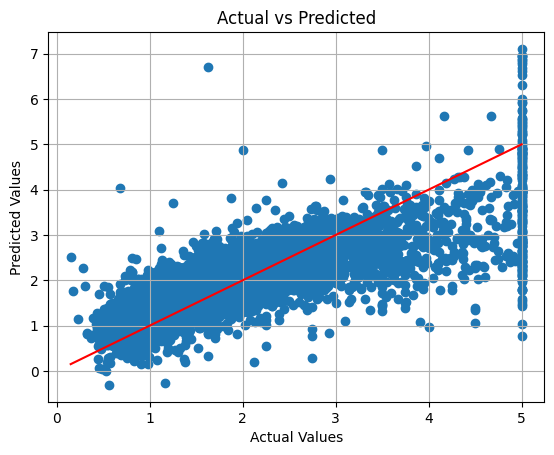

In [24]:
#PLOTTING PREDICTIONS VS ACTUAL 
import numpy as np
import matplotlib.pyplot as plt
X_test = tf.cast(X_test, tf.float32)
y_pred_final = tf.matmul(X_test, W) + b
plt.scatter(Y_test, y_pred_final)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  # ideal line
plt.show()